In [22]:
import numpy
import tifffile
from pathlib import Path
import operator
import matplotlib.pyplot as plt

In [36]:
images = list(Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/high_time_res/High/images/H1_T8").glob("*Ch1.*.tif"))[:400]
tile_output = Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/high_time_res/High/tiles/H1_T8/")
tile_output.mkdir(exist_ok=True)

In [37]:
def cropND(img, bounding):
  
    # compute possibly necessary padding widths
    padding = tuple(map(lambda a,b: abs(min(0, b-a)), bounding, img.shape))
    if sum(padding) > 0:
      
        # split padding into before and after part
        before_after = tuple(map(lambda a: (a//2, (a//2)+(a%2)), padding))
        img = numpy.pad(
            array=img,
            pad_width=before_after,
            mode="edge"
        )
        
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

In [44]:
ncols = 10
nrows = 20
ntiles = (len(images) // (ncols*nrows)) + ((len(images) % (ncols*nrows)) != 0)
channels = [1, 4, 7]
bounding = len(channels), 48, 48

In [47]:
tile.shape

(3, 960, 480)

In [61]:
for i in range(ntiles):
    tile = numpy.zeros(shape=(bounding[0], bounding[1]*nrows, bounding[2]*ncols), dtype=float)
    
    start = i * (ncols * nrows)
    end = (i + 1) * (ncols * nrows)
    for j, image in enumerate(images[start:end]):
        
        paths = [
            images[0].parent / images[0].name.replace("Ch1", "Ch"+str(c))
            for c in channels
        ]
        
        row = j // ncols
        col = j % ncols
        pixels = cropND(tifffile.imread(paths, key=0), bounding)
        
        tile[
            :,
            row*bounding[1]:(row+1)*bounding[1],
            col*bounding[2]:(col+1)*bounding[2]
        ] = pixels

    for j, t in enumerate(tile):
        tifffile.imwrite(str(tile_output / f"{i}_Ch{channels[j]}.tiff"), t, photometric="minisblack")

TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER


In [52]:
tile = tifffile.imread(str(tile_output / "1.tiff"), key=[0, 1])

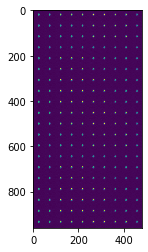

In [53]:
plt.imshow(tile[1])

In [64]:
data = []

ch1 = Path(tile_output).glob("*Ch1.tiff")
ch4 = Path(tile_output).glob("*Ch4.tiff")
ch7 = Path(tile_output).glob("*Ch7.tiff")

for p1, p2, p3 in zip(ch1, ch4, ch7):
    out = {
        "Image_FileName_1": str(p1.name),
        "Image_PathName_1": str(p1.parent),
        "Image_FileName_4": str(p2.name),
        "Image_PathName_4": str(p2.parent),
        "Image_FileName_7": str(p3.name),
        "Image_PathName_7": str(p3.parent)
    }
    data.append(out)

In [67]:
import pandas
pandas.DataFrame(data).to_csv(str(tile_output / "metadata.csv"), index=False)